# TCSS 478/588 In-class Exercise: Data distribution and correlation

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in data
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [2]:
getwd()

[1] "/home/jovyan"

In [3]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)

In [4]:
# dim = dimention
dim (my.data)

[1] 438 979

In [5]:
my.data[1:5, 1:6]

,X,PSME1,ATF1,RHEB,FOXO3,RHOA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773
2,IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396
3,IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781
4,EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348
5,THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959


In [6]:
# assign the first column of my.data to become rownames
dimnames(my.data)[[1]] <- my.data[,1]
#get rid of column 1 in my.data
my.data <- my.data[, -1]
my.data[1:5, 1:6]

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773,-0.007325439
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396,0.070951154
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781,0.025003360
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348,0.024005885
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959,-0.001752450


In [33]:
dim (my.data)

[1] 438 978

## 2. Plot a histogram 

In [ ]:
hist(my.data) #hist(my.data) doesnt work because the x must be a vector of values, but the my.data is a matrix.

In [19]:
temp <- as.vector (unlist(my.data), mode="numeric")

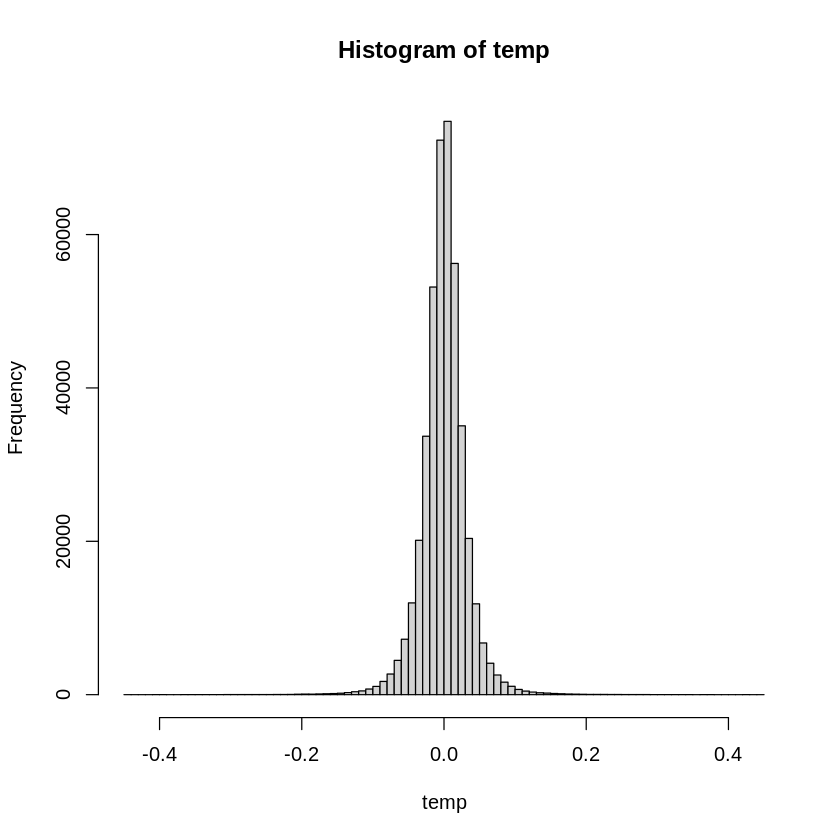

In [20]:
hist(temp, nclass=100)

## Your task 1: Plot a histogram of gene ATF1.  After you are done, check with your neighbors. 

In [22]:
# want to save the histogram as a png file
png("hist1.png")
hist(temp, nclass=100)
dev.off()

png 
  2

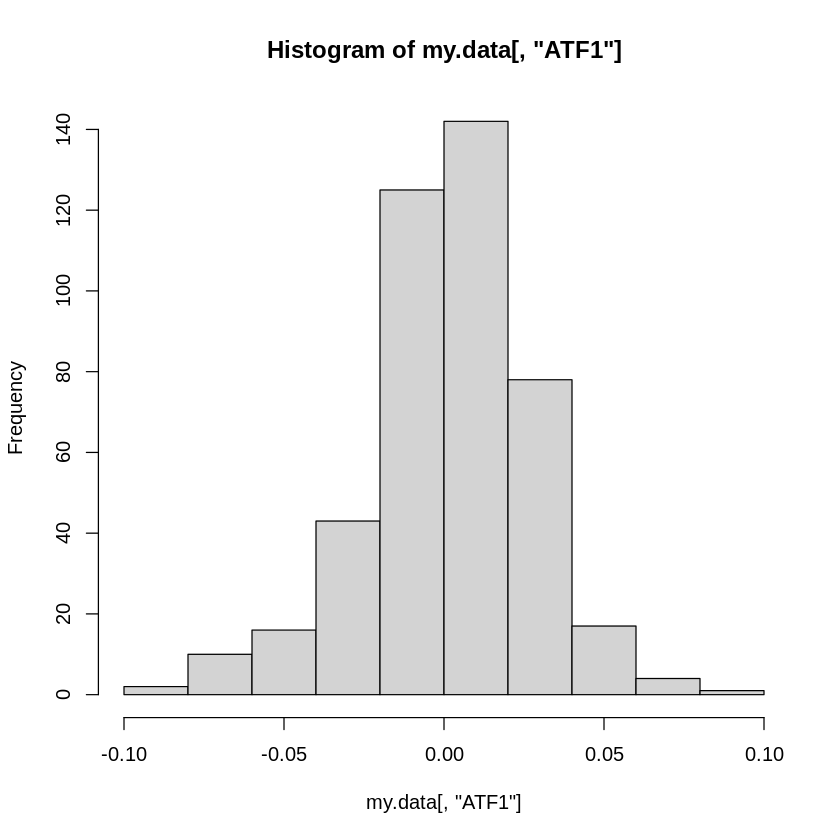

In [42]:
#temp2 <- as.vector (unlist(my.data[,2]), mode="numeric")
#hist(temp2, nclass=100)
#hist (my.data[,2])
hist (my.data[,"ATF1"])

## 3. Check the range of the data.

In [36]:
max(my.data)

[1] 0.4449588

In [37]:
min(my.data)

[1] -0.4458918

In [39]:
mean(my.data)

Warning message in mean.default(my.data):
“argument is not numeric or logical: returning NA”


[1] NA

In [38]:
mean(temp)

[1] 1.091541e-17

## 4. Boxplot

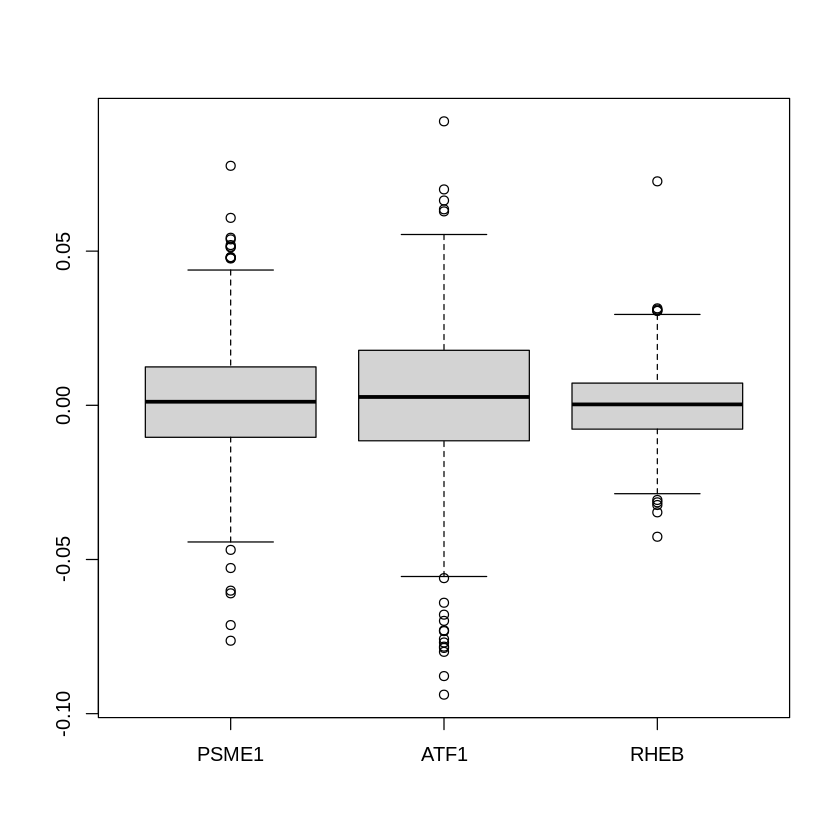

In [8]:
boxplot (my.data[, 1:3])

In [43]:
X <- c(1, 0, -1, 0) #c stands for concatenate
W <- c(2, 0, -2, 0)
cor (X, W)

[1] 1

In [44]:
my.data[1:2, 1:6]

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACETAZOLAMIDE,-0.01515910,-0.03147053,-0.004733488,0.02591061,0.005629677,-0.007325439
IRBESARTAN,-0.02681198,0.01215198,-0.025550148,-0.02401181,-0.010671740,0.070951154


In [45]:
cor(my.data[, 1], my.data[,2])

[1] 0.02669966

In [46]:
# compute the correlation between PSME1 and ATF1
cor(my.data[, "PSME1"], my.data[,"ATF1"])

[1] 0.02669966

## Task 2: What is the correlation coefficient among all possible pairs of genes? How about the minimum correlation? Can you do this without a double nested loop?

In [47]:
correlation <- cor(my.data)

In [48]:
correlation

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B,ASAH1,RALA,ARHGEF12,SOX2,⋯,CCP110,STK10,UGDH,SQRDL,HEBP1,ATP11B,CD320,MLLT11,CEBPZ,CBR3
PSME1,1.000000000,0.026699663,0.033151809,-0.0126188574,0.001813023,-0.009108597,-0.096497245,-0.0124094731,-0.070925659,-0.084706615,⋯,0.042738018,0.012158864,-0.057234496,0.0834504033,0.0911128163,-0.089824204,0.0988864406,-0.0070067323,0.122991723,0.031592811
ATF1,0.026699663,1.000000000,0.127226603,-0.1147250388,0.015006002,-0.048410774,0.199088611,0.1398941247,-0.064300902,-0.103227257,⋯,0.046980102,0.008251743,-0.056920101,-0.0380388622,0.0822461928,-0.106877537,-0.0507805586,-0.0216718324,-0.038651009,-0.052192689
RHEB,0.033151809,0.127226603,1.000000000,-0.0486450461,0.119331159,-0.179658776,0.112075730,-0.1013062598,0.029579953,-0.063637341,⋯,-0.058862480,-0.083351286,-0.098929430,0.0681689931,-0.0125830126,0.007603139,0.1921010203,0.0340342318,0.016455065,0.046751823
FOXO3,-0.012618857,-0.114725039,-0.048645046,1.0000000000,0.088304142,-0.076713613,0.003838180,-0.1035809440,-0.086347594,-0.055620098,⋯,-0.065246913,-0.113148420,0.028609748,0.0508215002,-0.0273243604,-0.099437697,0.0666928696,-0.0347831063,0.013061700,-0.032662765
RHOA,0.001813023,0.015006002,0.119331159,0.0883041419,1.000000000,-0.061326215,0.012853942,-0.1147142613,0.151936855,0.034189136,⋯,-0.097409682,-0.073421955,-0.074858390,-0.0356639356,-0.0698902063,-0.012397679,0.0555489723,0.0788979597,-0.014487375,-0.021919466
IL1B,-0.009108597,-0.048410774,-0.179658776,-0.0767136128,-0.061326215,1.000000000,-0.032400635,0.1861702712,0.130771768,0.060919093,⋯,0.041705687,0.136906695,0.028085435,0.0001252603,-0.0080207924,0.012838278,-0.1020530993,0.0008126548,-0.093737307,0.060929604
ASAH1,-0.096497245,0.199088611,0.112075730,0.0038381796,0.012853942,-0.032400635,1.000000000,0.0313473397,-0.024305277,-0.050899126,⋯,0.028769321,-0.036443473,-0.042174030,-0.0445758464,0.0546031456,0.032890532,-0.0102470965,-0.0213449653,-0.097685834,0.001502064
RALA,-0.012409473,0.139894125,-0.101306260,-0.1035809440,-0.114714261,0.186170271,0.031347340,1.0000000000,0.098216372,-0.028158856,⋯,0.048815669,0.132883922,0.035655743,-0.0468366202,0.0081508850,0.003997155,-0.0992862186,0.0430569283,-0.074800562,-0.064888023
ARHGEF12,-0.070925659,-0.064300902,0.029579953,-0.0863475938,0.151936855,0.130771768,-0.024305277,0.0982163720,1.000000000,0.094736250,⋯,0.018371281,0.080467813,-0.005804338,-0.0061944314,-0.0546184649,0.009761368,0.0135681336,0.0974630071,-0.138608394,-0.058862510
SOX2,-0.084706615,-0.103227257,-0.063637341,-0.0556200975,0.034189136,0.060919093,-0.050899126,-0.0281588559,0.094736250,1.000000000,⋯,0.007617399,0.018755871,-0.017344488,-0.0503841331,-0.0951958648,-0.020100638,-0.0808933613,0.0237314981,-0.001808223,0.028759423


In [56]:
dim (correlation)

[1] 978 978

In [57]:
max(correlation)
min(correlation)

[1] 1

[1] -0.7655029

In [ ]:
curr.max <- -1
curr.min <- 1
for(i in 1:ncol(my.data)) {
    ret.cor <- apply (my.data[,-i], 2, function(x) {cor(my.data[, i], x)})
    curr.max <- max (c(curr.max, ret.cor))
    curr.min <- min (c(curr.min, ret.cor))
    }

In [55]:
curr.max
curr.min

[1] 0.5227213

[1] -0.7655029

In [58]:
# replace the diagonal entries in "correlation"
for (i in 1:ncol(correlation)) {
    correlation[i, i] <- -2
    }

In [59]:
max(correlation)

[1] 0.5227213